# The Bias–Variance Tradeoff

This notebook delves into the theoretical aspects of estimating regression functions, focusing on how the bias-variance tradeoff explains the relationship between model flexibility and the errors a model makes.

# The Regression Setup

Consider a general regression setup where we have a random pair $(\mathbf{X}, Y) \in \mathbb{R}^p \times \mathbb{R}$. Our goal is to *predict* $Y$ using some function of $\mathbf{X}$, say, $f(\mathbf{X})$.

To clarify what we mean by *predict*, we want $f(\mathbf{X})$ to be **close** to $Y$. We define the squared error loss of estimating $Y$ using $f(\mathbf{X})$ as:
$$
L(Y, f(\mathbf{X})) \equiv (Y - f(\mathbf{X}))^2
$$

The goal of regression is to minimize this loss on average, known as the risk:
$$
R(Y, f(\mathbf{X})) \equiv \mathbb{E}[L(Y, f(\mathbf{X}))] = \mathbb{E}_{\mathbf{X}, Y}[(Y - f(\mathbf{X}))^2]
$$

We can re-write the risk after conditioning on $\mathbf{X}$:
$$
\mathbb{E}_{\mathbf{X}, Y}[(Y - f(\mathbf{X}))^2] = \mathbb{E}_{\mathbf{X}} \mathbb{E}_{Y|\mathbf{X}}[(Y - f(\mathbf{X}))^2 | \mathbf{X} = \mathbf{x}]
$$

Minimizing the inner expectation with respect to $Y$, the risk is minimized by setting $f(\mathbf{x})$ equal to the conditional mean of $Y$ given $\mathbf{X}$:
$$
f(\mathbf{x}) = \mathbb{E}(Y | \mathbf{X} = \mathbf{x})
$$

The choice of squared error loss is somewhat arbitrary. If we chose absolute error loss:
$$
L(Y, f(\mathbf{X})) \equiv |Y - f(\mathbf{X})|
$$

The risk would be minimized by setting $f(\mathbf{x})$ equal to the conditional median:
$$
f(\mathbf{x}) = \text{median}(Y | \mathbf{X} = \mathbf{x})
$$

We prefer squared error loss for various reasons, including historical context, ease of optimization, and protection against large deviations.

Given data $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, our goal is to find some $\hat{f}$ that estimates the regression function $f$. This involves minimizing what we call the reducible error.

# Reducible and Irreducible Error

When we obtain some $\hat{f}$, we define the **expected prediction error** of predicting $Y$ using $\hat{f}(\mathbf{X})$:
$$
\text{EPE}(Y, \hat{f}(\mathbf{X})) \equiv \mathbb{E}_{\mathbf{X}, Y, D}[(Y - \hat{f}(\mathbf{X}))^2]
$$

This expectation is over $\mathbf{X}$, $Y$, and the data $D$. The estimate $\hat{f}$ is random depending on the data $D$ used to estimate $f$.

Conditioning on $\mathbf{X}$, the expected prediction error is:
$$
\text{EPE}(Y, \hat{f}(\mathbf{x})) = \mathbb{E}_{Y|\mathbf{X}, D}[(Y - \hat{f}(\mathbf{X}))^2 | \mathbf{X} = \mathbf{x}] = \mathbb{E}_D[(f(\mathbf{x}) - \hat{f}(\mathbf{x}))^2] + \text{Var}_{Y|\mathbf{X}}[Y | \mathbf{X} = \mathbf{x}]
$$

This decomposes the expected prediction error into:
1. **Reducible Error**: The expected squared error loss of estimating $f(\mathbf{x})$ using $\hat{f}(\mathbf{x})$ at a fixed point $\mathbf{x}$. The only randomness is in $D$, the data used to obtain $\hat{f}$. 
   $$
   \text{MSE}(f(\mathbf{x}), \hat{f}(\mathbf{x})) \equiv \mathbb{E}_D[(f(\mathbf{x}) - \hat{f}(\mathbf{x}))^2]
   $$

2. **Irreducible Error**: The variance of $Y$ given $\mathbf{X} = \mathbf{x}$, which is noise we do not want to learn. Also known as the Bayes error.
   $$
   \text{Var}_{Y|\mathbf{X}}[Y | \mathbf{X} = \mathbf{x}]
   $$



# Bias-Variance Decomposition

We can further decompose the reducible error into bias squared and variance.

The bias of an estimator is defined as:
$$
\text{bias}(\hat{\theta}) \equiv \mathbb{E}[\hat{\theta}] - \theta
$$

The variance of an estimator is:
$$
\text{Var}(\hat{\theta}) \equiv \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2]
$$

Thus, the reducible error (mean squared error) can be decomposed as:
$$
\text{MSE}(f(\mathbf{x}), \hat{f}(\mathbf{x})) = \mathbb{E}_D[(f(\mathbf{x}) - \hat{f}(\mathbf{x}))^2] = (f(\mathbf{x}) - \mathbb{E}[\hat{f}(\mathbf{x})])^2 + \mathbb{E}[(\hat{f}(\mathbf{x}) - \mathbb{E}[\hat{f}(\mathbf{x})])^2]
$$

In an ideal world, we would find an estimator $\hat{f}$ that perfectly captures the true relationship between the input variables $\mathbf{X}$ and the output variable $Y$. This ideal estimator would be unbiased, meaning that its expected value over all possible training datasets is equal to the true function $f$. Mathematically, an unbiased estimator satisfies $\mathbb{E}[\hat{f}(\mathbf{x})] = f(\mathbf{x})$ for all $\mathbf{x}$, or equivalently, $\text{bias}(\hat{f}(\mathbf{x})) = \mathbb{E}[\hat{f}(\mathbf{x})] - f(\mathbf{x}) = 0$. Furthermore, we would want this estimator to have low variance, meaning that it would produce similar predictions across different training datasets.

However, in practice, it is often impossible to find an estimator that is both unbiased and has low variance. This is because there is a fundamental tradeoff between bias and variance, known as the bias-variance tradeoff. As we increase the complexity of a model (e.g., by adding more parameters or using a more flexible functional form), we generally decrease its bias but increase its variance. Conversely, as we decrease the complexity of a model, we generally increase its bias but decrease its variance.

In the context of regression, the bias and variance of a model can be understood as follows:

- **Bias**:
  - **Parametric Models**: A parametric model is biased if it does not include all the necessary input variables to capture the true relationship between $\mathbf{X}$ and $Y$, or if the functional form of the model is too simple. For example, if the true relationship is quadratic but we fit a linear model, the model will be biased.
  - **Non-parametric Models**: A non-parametric model is biased if it provides too much smoothing, effectively oversimplifying the relationship between $\mathbf{X}$ and $Y$.

- **Variance**:
  - **Parametric Models**: A parametric model has high variance if it includes too many input variables or if its functional form is too flexible. For example, if the true relationship is linear but we fit a cubic model, the model will have high variance.
  - **Non-parametric Models**: A non-parametric model has high variance if it does not provide enough smoothing, resulting in a "wiggly" or overly complex estimate of the relationship between $\mathbf{X}$ and $Y$.

To minimize the reducible error (i.e., the mean squared error) and achieve the best predictive performance, we need to select a model with the appropriate level of flexibility for the given dataset. This involves balancing the tradeoff between bias and variance.

As we increase the flexibility of a model, the training RMSE (root mean squared error) will generally decrease, as the model becomes better at fitting the training data. However, the validation RMSE (i.e., the RMSE on a separate validation dataset) will typically follow a U-shaped curve. Initially, the validation RMSE decreases as the model becomes more flexible and reduces its bias. However, beyond a certain level of flexibility, the validation RMSE starts to increase as the model becomes overly complex and starts to overfit the training data, leading to high variance.

This behavior can be understood by decomposing the expected prediction error (EPE) for a given input $\mathbf{x}$ into three components: the squared bias, the variance, and the irreducible Bayes error $\sigma^2$:

$$
\text{EPE}(Y, \hat{f}(\mathbf{x})) = \text{bias}^2(\hat{f}(\mathbf{x})) + \text{Var}(\hat{f}(\mathbf{x})) + \sigma^2
$$

The Bayes error $\sigma^2$ represents the inherent uncertainty in the relationship between $\mathbf{X}$ and $Y$ that cannot be reduced by any model. The squared bias and variance, on the other hand, are influenced by the choice of model and its flexibility.

As we increase model flexibility, the squared bias decreases while the variance increases. The optimal level of flexibility is the one that minimizes the sum of the squared bias and variance, thereby minimizing the reducible error and achieving the best trade-off between underfitting and overfitting.

By understanding the bias-variance tradeoff and how it relates to model flexibility, we can select models that are likely to perform well on unseen data, striking a balance between underfitting and overfitting. This involves choosing an appropriate model class (e.g., linear vs. non-linear) and carefully tuning any hyperparameters that control the model's flexibility (e.g., the degree of a polynomial regression model or the smoothing parameter of a non-parametric model).

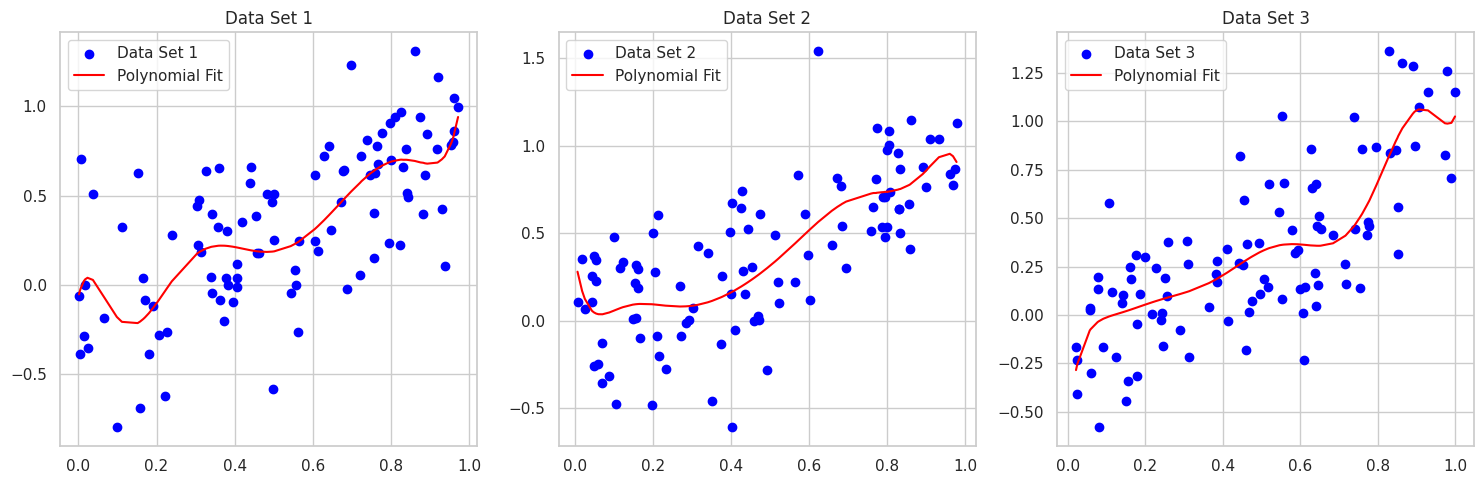

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

from jax import random

# Function to generate simulation data
def generate_simulation_data(key, f, sample_size=100):
    """
    Generates simulation data based on a regression function and random noise.
    
    Args:
    key (jax.random.PRNGKey): Random key for generating random numbers.
    f (function): Regression function to generate the mean of y given x.
    sample_size (int): Number of samples to generate (default is 100).
    
    Returns:
    tuple: Arrays of generated x and y values.
    """
    key_x, key_y = random.split(key)
    x = random.uniform(key_x, shape=(sample_size,), minval=0, maxval=1)
    noise = random.normal(key_y, shape=(sample_size,)) * 0.3
    y = f(x) + noise
    return x, y

# Regression function
def regression_function(x):
    """
    Defines the regression function f(x) = x^2.
    
    Args:
    x (array): Input array of x values.
    
    Returns:
    array: Output array where each element is x^2.
    """
    return x ** 2

# Generate random keys
key1, key2, key3 = random.split(random.PRNGKey(10), 3)

# Generate data sets
x1, y1 = generate_simulation_data(key1, regression_function)
x2, y2 = generate_simulation_data(key2, regression_function)
x3, y3 = generate_simulation_data(key3, regression_function)

# Create a polynomial regression pipeline
def create_polynomial_regression_pipeline(degree):
    """
    Creates a polynomial regression pipeline.
    
    Args:
    degree (int): The degree of the polynomial features.
    
    Returns:
    Pipeline: A scikit-learn pipeline with polynomial features and linear regression.
    """
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression()),
    ])

# Create polynomial regression models
model1 = create_polynomial_regression_pipeline(degree=9)
model2 = create_polynomial_regression_pipeline(degree=9)
model3 = create_polynomial_regression_pipeline(degree=9)

# Fit the models
model1.fit(x1.reshape(-1, 1), y1)
model2.fit(x2.reshape(-1, 1), y2)
model3.fit(x3.reshape(-1, 1), y3)

# Generate predictions
y1_pred = model1.predict(np.sort(x1).reshape(-1, 1))
y2_pred = model2.predict(np.sort(x2).reshape(-1, 1))
y3_pred = model3.predict(np.sort(x3).reshape(-1, 1))

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the generated data sets
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

# Plot for Data Set 1
axes[0].scatter(x1, y1, color='blue', label='Data Set 1')
axes[0].plot(np.sort(x1), y1_pred, color='red', label='Polynomial Fit')
axes[0].legend()
axes[0].set_title('Data Set 1')

# Plot for Data Set 2
axes[1].scatter(x2, y2, color='blue', label='Data Set 2')
axes[1].plot(np.sort(x2), y2_pred, color='red', label='Polynomial Fit')
axes[1].legend()
axes[1].set_title('Data Set 2')

# Plot for Data Set 3
axes[2].scatter(x3, y3, color='blue', label='Data Set 3')
axes[2].plot(np.sort(x3), y3_pred, color='red', label='Polynomial Fit')
axes[2].legend()
axes[2].set_title('Data Set 3')

# Display the plots
plt.tight_layout()
plt.show()


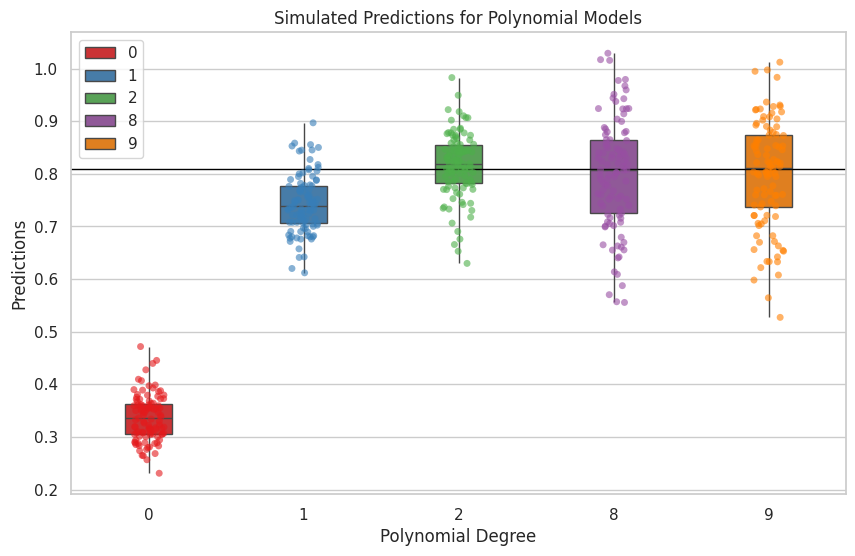

In [87]:
# Generate random keys
base_key = random.PRNGKey(10)

# Generate initial data
x, y = generate_simulation_data(base_key, regression_function)

# Set polynomial degrees to test
degrees = [0, 1, 2, 8,  9]

# Initialize plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# True value for comparison
true_value = regression_function(0.9)

# Generate predictions for different polynomial degrees
predictions = []
degrees_list = []

for degree in degrees:
    model = create_polynomial_regression_pipeline(degree)
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(np.array([0.9]).reshape(-1, 1))
    predictions.append(y_pred[0])
    degrees_list.append(degree)

    # Simulate multiple predictions by fitting on different splits
    for i in range(100):
        # Generate a new random key for each iteration
        new_key, base_key = random.split(base_key)
        
        # Generate new data
        x_sim, y_sim = generate_simulation_data(new_key, regression_function)
        model.fit(x_sim.reshape(-1, 1), y_sim)
        y_pred = model.predict(np.array([0.9]).reshape(-1, 1))
        predictions.append(y_pred[0])
        degrees_list.append(degree)

# Plot the predictions
sns.boxplot(x=degrees_list, y=predictions, whis=[0, 100], width=0.3, showcaps=False, hue = degrees_list, showfliers=False, palette="Set1")
sns.stripplot(x=degrees_list, y=predictions, alpha=0.6, jitter=True, hue=degrees_list, palette="Set1", legend=False)

plt.axhline(y=true_value, color='black', linestyle='-', linewidth=1)
plt.title('Simulated Predictions for Polynomial Models')
plt.xlabel('Polynomial Degree')
plt.ylabel('Predictions')
plt.show()